<h1 style='text-align:center ; color:red ;'><strong>Image Classification with CIFAR-10 Dataset Using Neural Networks</strong></h1>

<h2><strong>Overview</strong></h2>
<p>This Jupyter notebook demonstrates building and training a neural network for image classification using the CIFAR-10 dataset. The implementation includes:</p>
<ul>
<li>Data preprocessing and visualization</li>
<li>Model architecture design with dense layers</li>
<li>Training and evaluation on GPU vs CPU</li>
<li>Performance comparison between different hardware configurations</li>
</ul>

<h2><strong>Dataset: CIFAR-10</strong></h2>
<p>The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes:</p>
<ul>
<li><strong>Training set:</strong> 50,000 images</li>
<li><strong>Test set:</strong> 10,000 images</li>
<li><strong>Classes:</strong> airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck</li>
</ul>

<h2><strong>Key Features</strong></h2>
<ul>
<li><strong>Data Preparation:</strong> Normalization, one-hot encoding, and sample visualization</li>
<li><strong>Model Architecture:</strong> Sequential neural network with flattening and dense layers</li>
<li><strong>Training:</strong> 50 epochs with categorical cross-entropy loss</li>
<li><strong>Hardware Comparison:</strong> Performance benchmarking between CPU and GPU execution</li>
<li><strong>Evaluation:</strong> Model accuracy and loss metrics on test data</li>
</ul>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# List all physical devices
print(tf.config.list_physical_devices())
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('CPU'))
# we will use GPU and CPU and then compare between them in terms of performance , i have configured my GPU of my own computer(windows OS) with cuda toolkit 
# you can see more details for the configuration in  https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
 tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 46s 0us/step


In [5]:
X_train.shape 

(50000, 32, 32, 3)

In [6]:
  X_train[0][0][0] # should be the value of one pixel,colored pixel mean the pixel value is a combination of three values for red , green and blue

array([59, 62, 63], dtype=uint8)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:15]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9]], dtype=uint8)

In [33]:
def plot_sample(index):
    plt.figure(figsize=(30,3))               # square figure to keep aspect ratio
    plt.imshow(X_train[index])              # RGB image, no cmap needed
    plt.axis('off')                         # hide axes
    plt.title(f"Sample index: {index}")    # optional title
    plt.show()

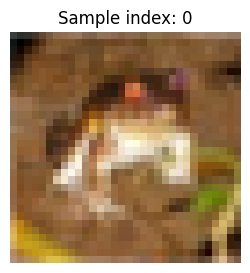

In [34]:
plot_sample(0)

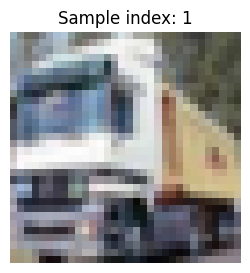

In [35]:
plot_sample(1)

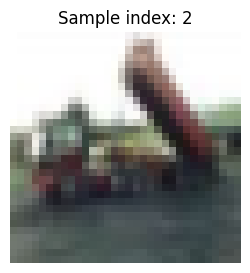

In [36]:
plot_sample(2)

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [41]:
classes[y_train[2][0]]

'truck'

In [42]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

##### Convert integer class labels to one-hot encoded vectors for training


In [43]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes=10 , dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
 y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10 , dtype='float32'
)

In [49]:
model = keras.Sequential([
    #Flatten takes a multi-dimensional array (like an image) and turns it into a 1D vector.
    #Neural networks (Dense/Fully Connected layers) expect 1D input.
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
# Use 'categorical_crossentropy' when labels are one-hot encoded (e.g., [0,0,1,0,...])
# Use 'sparse_categorical_crossentropy' when labels are integers (e.g., 3, 5, 8)
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train_scaled , y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8145 - accuracy: 0.3524
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6231 - accuracy: 0.4266
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5428 - accuracy: 0.4557
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4827 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4315 - accuracy: 0.4962
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3863 - accuracy: 0.5124
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3496 - accuracy: 0.5265
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3148 - accuracy: 0.5391
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2823 - accuracy: 0.5511
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.251

In [53]:
classes[y_test[0][0]]

'cat'

In [55]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

##### we can see here that the predicted value 'cat' is the same as the true value

In [56]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 1.5367 - accuracy: 0.5687


[1.5366929769515991, 0.5687000155448914]

In [60]:
  def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])
    model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
    return model

In [62]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical,epochs=1)

1563/1563 [==============================] - 37s 23ms/step - loss: 1.8074 - accuracy: 0.3570


In [63]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical,epochs=1)

1563/1563 [==============================] - 6s 3ms/step - loss: 1.8126 - accuracy: 0.3518
6.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


##### See the difference here between the performance of a cpu and a gpu ,one epoch with cpu taked **37s** and with gpu , it taked **6s** **!**